Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [277]:
import json

with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

In [278]:
df = pd.DataFrame(data)

In [279]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [280]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [282]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [283]:
from sklearn import preprocessing

class Categorical_encoding:
    def __init__(self, df, categorical_features):
        self.df = df
        self.output_df = self.df.copy(deep=True)
        self.cat_features = categorical_features
        
        for c in self.cat_features:
            self.df.loc[:,c] = self.df.loc[:,c].astype(str).fillna(-1)
    
    def label_encoding(self):
        for c in self.cat_features:
            lbl = preprocessing.LabelEncoder()
            lbl.fit(self.df[c].values)
            self.output_df.loc[:,c] = lbl.transform(self.df[c].values)
        
        return self.output_df

In [284]:
df['30Active'] = (df['trips_in_first_30_days'] > 0).replace({True: 1, False: 0}) #'active' user retended 

In [285]:
retention_fraction = ((df['30Active'] == 1).sum()/df.shape[0])*100 #(sum of active/total rows)
print(retention_fraction,"% of users retained (active)")

69.22 % of users retained (active)


1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

A. 69.22 % of users retained (active)

In [286]:
#Cities with user retained fraction

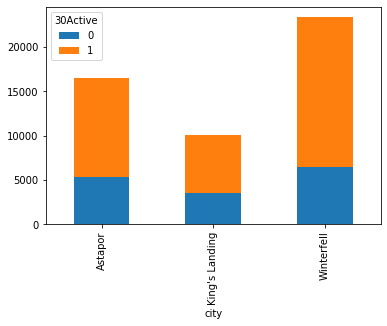

In [287]:
df.groupby(['city','30Active'])['trips_in_first_30_days'].count().unstack().plot(kind='bar', stacked=True)

WinterFell city has relatively higher percentage of retained users.

In [288]:
#date time format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [289]:
df['last_trip_date'].dt.month.value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: last_trip_date, dtype: int64

In [290]:
#transforming last_trip_date, assuming users with last trip date(month) greater than 6 not active in 6.

In [291]:
df['last_trip_date'] = (df['last_trip_date'].dt.month == 6).replace({True: 1, False: 0})

In [292]:
df.rename(columns = {'last_trip_date':'6MonthActive'}, inplace = True) 

In [293]:
#transforming 'ultimate_black_user' to numbers

In [294]:
df['ultimate_black_user'] = df['ultimate_black_user'].replace({True: 1, False: 0})

In [295]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,6MonthActive,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,30Active
0,King's Landing,4,2014-01-25,4.7,1.10,1,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,0,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,0,iPhone,0.0,0,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,1,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,0,Android,11.8,0,82.4,3.13,4.9,1


In [296]:
#Encodings

In [297]:
cols = ['city','phone'] 

en_df = Categorical_encoding(df,cols)  
df = en_df.label_encoding()

In [298]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,6MonthActive,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,30Active
0,1,4,2014-01-25,4.7,1.10,1,2,15.4,1,46.2,3.67,5.0,1
1,0,0,2014-01-29,5.0,1.00,0,0,0.0,0,50.0,8.26,5.0,0
2,0,3,2014-01-06,4.3,1.00,0,2,0.0,0,100.0,0.77,5.0,1
3,1,9,2014-01-10,4.6,1.14,1,2,20.0,1,80.0,2.36,4.9,1
4,2,14,2014-01-27,4.4,1.19,0,0,11.8,0,82.4,3.13,4.9,1


In [299]:
#move target column to last
target_col_at_end = ['6MonthActive']
    
df = df[[c for c in df if c not in target_col_at_end] 
    + [c for c in target_col_at_end if c in df]]

In [300]:
#transforming sign up date to just day of month as we have signups just for 1 month
df['signup_date'].dt.day.value_counts()

18    2948
25    2885
11    2402
24    2284
17    2149
31    2100
19    2028
10    2021
6     1763
1     1737
26    1708
23    1606
7     1486
4     1485
30    1471
9     1433
16    1431
22    1369
5     1343
12    1334
20    1295
28    1284
8     1275
27    1236
21    1234
3     1213
29    1197
14    1120
15    1110
13    1049
2     1004
Name: signup_date, dtype: int64

In [301]:
df['signup_date'] = df['signup_date'].dt.day
df.rename(columns = {'signup_date':'signup_day_of_month'}, inplace = True) 

In [302]:
df.head()

,city,trips_in_first_30_days,signup_day_of_month,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,30Active,6MonthActive
0,1,4,25,4.7,1.10,2,15.4,1,46.2,3.67,5.0,1,1
1,0,0,29,5.0,1.00,0,0.0,0,50.0,8.26,5.0,0,0
2,0,3,6,4.3,1.00,2,0.0,0,100.0,0.77,5.0,1,0
3,1,9,10,4.6,1.14,2,20.0,1,80.0,2.36,4.9,1,1
4,2,14,27,4.4,1.19,0,11.8,0,82.4,3.13,4.9,1,0


/Users/Anand/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/Anand/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/Anand/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Anand/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


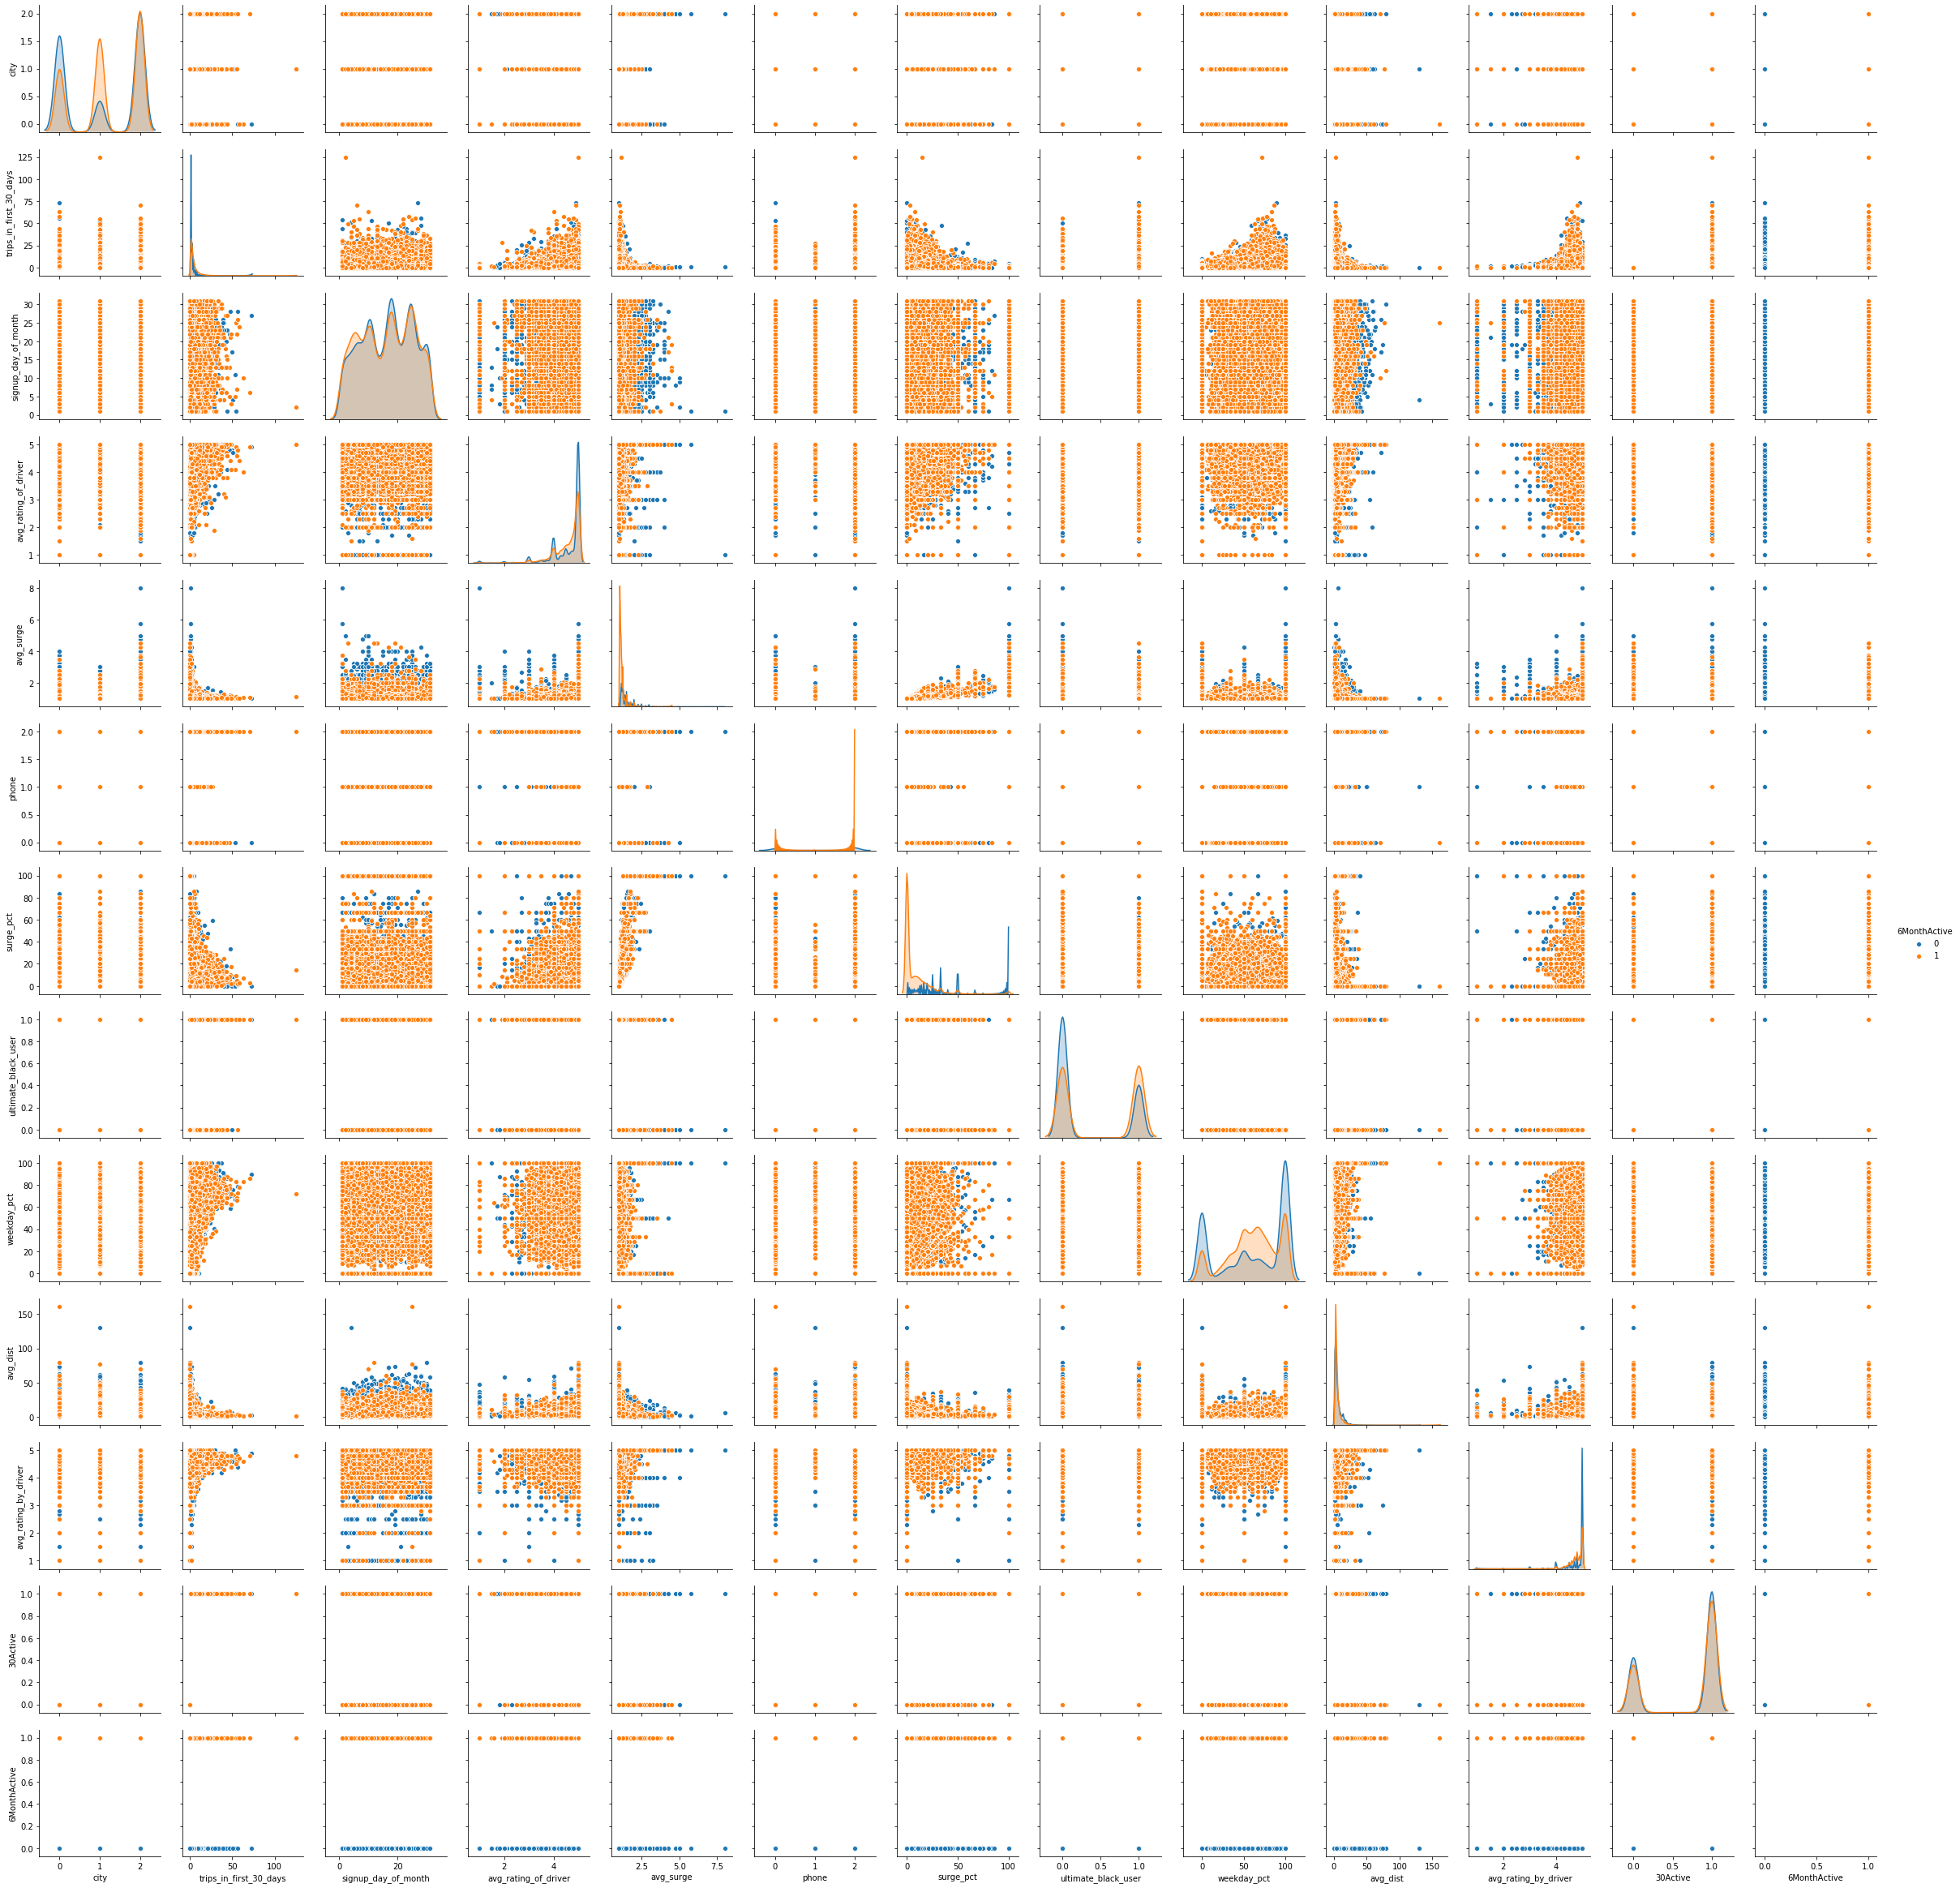

In [269]:
import seaborn as sns
sns.pairplot(df,hue='6MonthActive')

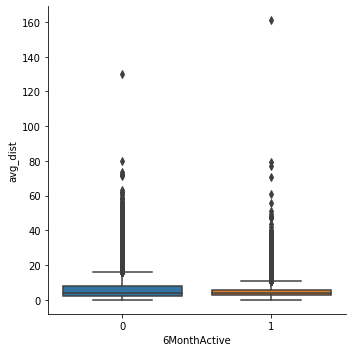

In [303]:
sns.catplot(x="6MonthActive", y="avg_dist", kind="box", data=df);

In [304]:
df = df.fillna(df.median())

In [305]:
X = df.drop(['6MonthActive'], axis=1)
y = df['6MonthActive']

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

clf = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=1)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [308]:
y_pred = clf.predict(X_test)

In [309]:
print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 0.763


In [310]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      9522
           1       0.69      0.63      0.66      5478

    accuracy                           0.76     15000
   macro avg       0.75      0.73      0.74     15000
weighted avg       0.76      0.76      0.76     15000



In [311]:
#comparing predictions

Text(0.5, 0, 'predicted destination countries')

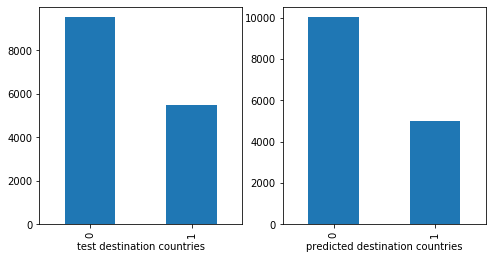

In [312]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
cat_counts = y_test.value_counts()
cat_counts.plot.bar()
plt.xlabel("test destination countries")

plt.subplot(1, 2, 2)
cat_counts = pd.Series(y_pred).value_counts()
cat_counts.plot.bar()
plt.xlabel("predicted destination countries")

In [313]:
clf.feature_importances_

array([0.06680988, 0.06151064, 0.13832919, 0.07406914, 0.06010335,
       0.03727483, 0.07667091, 0.03266665, 0.12604157, 0.21243302,
       0.10243976, 0.01165106])

In [314]:
f_imp_series = pd.Series(clf.feature_importances_, index=X_train.columns)

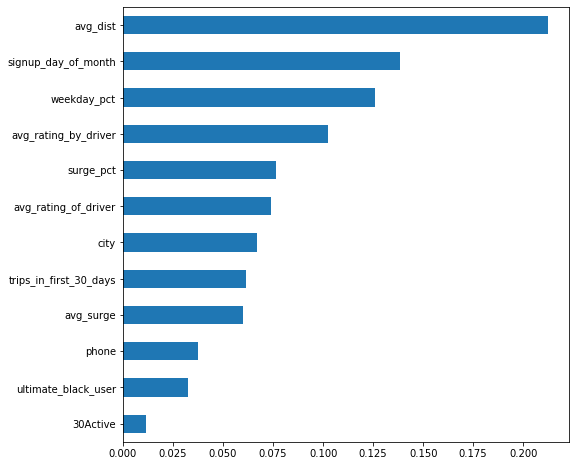

In [315]:
plt.figure(figsize=(8,8))
f_imp_series.sort_values().plot(kind='barh')

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

A. The problem we are looking at is a binary classification.i.e to predict if the user will retain after 6 month 
or not.

From the pairplot we see points of the two class seems to overlap which idicates there is a non linear relationship in the classification.

RandomForest classifier gives a test accuracy of 0.76

Avg_dis has the highest feature importance.